In [1]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np
import os
import pandas as pd
from scipy.interpolate import interp1d

# Set the universal font type to times new roman
plt.rcParams["font.family"] = "Times New Roman"

### Load the text files

In [2]:
col_names_dn = ['wavelength','dn']
col_names_rad = ['wavelength','amp']

# -------------------------------------- Digital Number --------------------------------------
# ---------------------- Deep Green Leaf Digital Number ----------------------
dgr_leaf_dn = pd.read_csv('Data/Leaf_DeepGreen_DigitalNumber_ASD.txt',skiprows=1, header=None, sep='\s+')
dgr_leaf_dn.columns = col_names_dn

# ---------------------- Light Green Leaf Digital Number ----------------------
lgr_leaf_dn = pd.read_csv('Data/Leaf_LightGreen_DigitalNumber_ASD.txt',skiprows=1, header=None, sep='\s+')
lgr_leaf_dn.columns = col_names_dn

# ---------------------- White Reference Digital Number ----------------------
wr_dn = pd.read_csv('Data/WhiteReference_DigitalNumber_ASD.txt',skiprows=1, header=None, sep='\s+')
wr_dn.columns = col_names_dn



# -------------------------------------- Absolute Radiance --------------------------------------
# ---------------------- Green Leaf Absolute Radiance ----------------------
gr_leaf_abs_rad = pd.read_csv('Data/Leaf_Green_AbsoluteRadiance_OO.txt',skiprows=13, header=None, sep='\s+')
gr_leaf_abs_rad.columns = col_names_rad

# ---------------------- Brown Leaf Absolute Radiance ----------------------
br_leaf_abs_rad = pd.read_csv('Data/Leaf_Brown_AbsoluteRadiance_OO.txt',skiprows=13, header=None, sep='\s+')
br_leaf_abs_rad.columns = col_names_rad

# ---------------------- Leaf White Reference Absolute Irradiance ----------------------
wr_leaf_abs_ird = pd.read_csv('Data/Leaf_WhiteReference_AbsoluteIrradiance_OO.txt',skiprows=13, header=None, sep='\s+')
wr_leaf_abs_ird.columns = col_names_rad



# -------------------------------------- Calibration Files --------------------------------------
# ---------------------- Lamp File Radiance Calibration ----------------------
lp_rad_cal = pd.read_csv('Data/LampFile_RadianceCalibration.txt',header=None, sep='\s+')
lp_rad_cal.columns = col_names_rad

# ---------------------- Lamp Absolute Irradiance ----------------------
lp_abs_ird = pd.read_csv('Data/LAMP_AbsoluteIrradiance.txt',skiprows=13, header=None, sep='\s+')
lp_abs_ird.columns = col_names_rad

### Question 1
- Plot white reference spectral radiant intensity measured with the ASD spectrometer (“WhiteReference_DigitalNumber_ASD.txt”; units = digital numbers) and white reference spectral radiant intensity measured outside under a clear sky with the OO spectrometer (“Leaf_WhiteReference_AbsoluteIrradiance_OO.txt”; units = uW/m2/nm/sr). <br><br>
- Discuss two differences in the spectrometers and the measurements that are apparent from the plots.

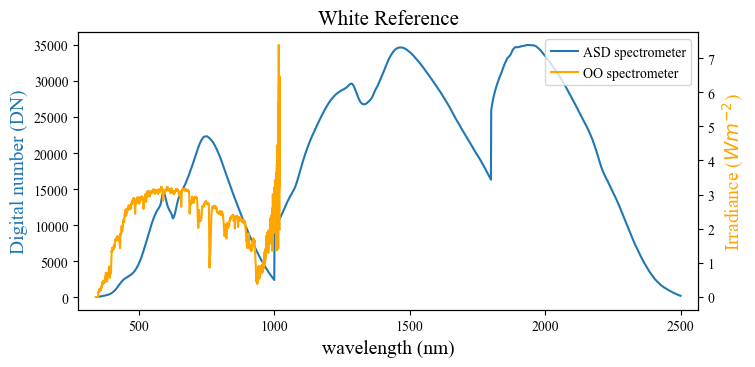

In [50]:
fig = plt.figure(figsize=(8,3.6))
ax = fig.add_subplot(111)
fs = 10
ax.plot(wr_dn.wavelength,wr_dn.dn,c='C0')
ax.margins(x=0.03)
ax.set_xlabel('wavelength (nm)',size=fs+4),ax.set_ylabel('Digital number (DN)',size=fs+4,c='C0')
ax1 = ax.twinx()
ax1.plot(wr_leaf_abs_ird.wavelength,wr_leaf_abs_ird.amp,c='orange')
ax1.set_ylabel('Irradiance ($Wm^{-2}$)',size=fs+4,c='orange')

# Create a single legend for the 2 axes
asd = Line2D([], [], color='C0', markersize=8)
oo = Line2D([], [], color='orange', markersize=8)
ax1.legend([asd,oo],['ASD spectrometer','OO spectrometer'],markerscale=1,
           handletextpad=0.3,loc='upper right',fontsize=fs)

ax.set_title('White Reference', size=fs+5)
for item in (ax.get_xticklabels() + ax.get_yticklabels() + ax1.get_yticklabels()):
        item.set_fontsize(fs)
        
plt.savefig('Lab_04_Q_01.png', dpi=200, facecolor='white', edgecolor='none', bbox_inches='tight')
plt.show()

### Question 2
- Plot relative leaf reflectance for the two spectrometer and the two samples. Light green (“Leaf_LightGreen_DigitalNumber_ASD.txt”) and dark green (“Leaf_DeepGreen_DigitalNumber_ASD.txt”) leaves for the ASD, and brown (“Leaf_Brown_AbsoluteRadiance_OO.txt”) and green (“Leaf_Green_AbsoluteRadiance_OO.txt”) leaves for the OO. <br><br>
- Describe three features of the relative reflectance curve that provide clues into the status of the leaf.

*Note*: $\text{Reflectance} = \frac{\text{leaf reflected spectral radiant intensity}} {\text{white reference spectral radiant intensity}}$

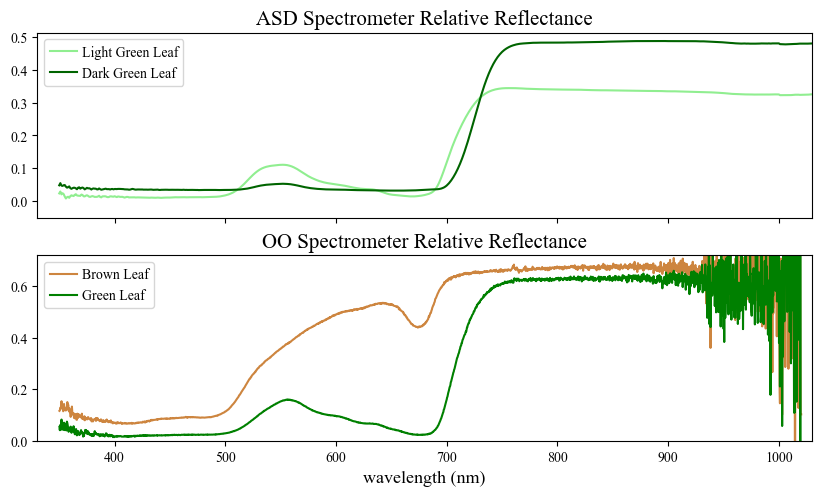

In [134]:
# -------------------------------- Calculate the relative reflectance (rr) --------------------------------
# ASD Spectrometer
rr_lg_leaf = lgr_leaf_dn.dn/wr_dn.dn
rr_dg_leaf = dgr_leaf_dn.dn/wr_dn.dn
# OO Spectrometer
rr_br_leaf = br_leaf_abs_rad.amp/wr_leaf_abs_ird.amp
rr_gr_leaf = gr_leaf_abs_rad.amp/wr_leaf_abs_ird.amp

# -------------------------------- Plot the relative reflectance --------------------------------
fig,axes = plt.subplots(2,1,figsize=(10,5.3),gridspec_kw={'hspace':0.2},sharex=True)
fs = 10
axes[0].plot(lgr_leaf_dn.wavelength,rr_lg_leaf,c='lightgreen',label='Light Green Leaf')
axes[0].plot(dgr_leaf_dn.wavelength,rr_dg_leaf,c='darkgreen',label='Dark Green Leaf')
axes[0].set_xlim(330,1030)
axes[0].margins(x=0.015),axes[0].legend(loc='upper left',handletextpad=0.3,fontsize=fs)
axes[0].set_title('ASD Spectrometer Relative Reflectance', size=fs+5)
axes[1].plot(br_leaf_abs_rad.wavelength,rr_br_leaf,c='peru',label='Brown Leaf')
axes[1].plot(gr_leaf_abs_rad.wavelength,rr_gr_leaf,c='green',label='Green Leaf')
axes[1].set_xlabel('wavelength (nm)',size=fs+3),axes[1].set_ylim(0,0.72)
axes[1].legend(loc='upper left',handletextpad=0.3,fontsize=fs)
axes[1].set_title('OO Spectrometer Relative Reflectance', size=fs+5)

plt.savefig('Lab_04_Q_02.png', dpi=200, facecolor='white', edgecolor='none', bbox_inches='tight')
plt.show()

### Question 3
 - Calculate the normalized difference vegetation index (NDVI) from each spectrometer and each sample (total of four NDVI values) and report your findings.
<br><br>
 $\text{NDVI} = \frac{\text{NIR} - \text{RED}} {\text{NIR} + \text{RED}}$

In [115]:
# Specify the wavelengths of the near infrared and red bands
nir = 800
red = 600

def ndvi(nir_val,red_val):
    result = round((nir_val - red_val)/(nir_val + red_val),2)
    return result

# Light green ASD NDVI
nir_idx = (lgr_leaf_dn['wavelength']-nir).abs().argsort()[0]
red_idx = (lgr_leaf_dn['wavelength']-red).abs().argsort()[0]
lg_ndvi = ndvi(rr_lg_leaf[nir_idx],rr_lg_leaf[red_idx])

# Dark green ASD NDVI
nir_idx = (dgr_leaf_dn['wavelength']-nir).abs().argsort()[0]
red_idx = (dgr_leaf_dn['wavelength']-red).abs().argsort()[0]
dg_ndvi = ndvi(rr_dg_leaf[nir_idx],rr_dg_leaf[red_idx])

# Brown OO NDVI
nir_idx = (br_leaf_abs_rad['wavelength']-nir).abs().argsort()[0]
red_idx = (br_leaf_abs_rad['wavelength']-red).abs().argsort()[0]
br_ndvi = ndvi(rr_br_leaf[nir_idx],rr_br_leaf[red_idx])

# Green OO NDVI
nir_idx = (gr_leaf_abs_rad['wavelength']-nir).abs().argsort()[0]
red_idx = (gr_leaf_abs_rad['wavelength']-red).abs().argsort()[0]
gr_ndvi = ndvi(rr_gr_leaf[nir_idx],rr_gr_leaf[red_idx])

print(f'Dark green leaf NDVI (ASD):  {dg_ndvi:.2f}',
      f'Light green leaf NDVI (ASD): {lg_ndvi}','\n',
      f'Green leaf NDVI (OO):        {gr_ndvi}',
      f'Brown leaf NDVI (OO):        {br_ndvi}',sep='\n')

Dark green leaf NDVI (ASD):  0.87
Light green leaf NDVI (ASD): 0.74


Green leaf NDVI (OO):        0.74
Brown leaf NDVI (OO):        0.16


### Question 4
- Compare the know radiance (“LampFile_RadianceCalibration.txt”) and the estimated radiance (“LAMP_AbsoluteIrradiance.txt”) following radiometric calibration in a scatter plot. <br><br> 
- Report the relationship.

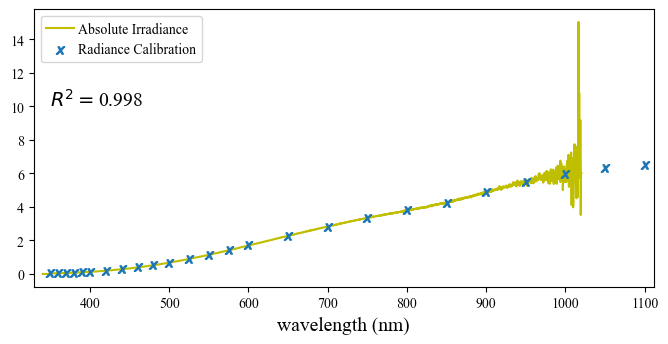

In [17]:
# ----------------- Calculate the correlation between both variables -----------------
# Downsample the irradiance to match the calibration file to calculate correlation
rd_wvlgth = lp_rad_cal.wavelength.to_numpy()
rd_wvlgth = rd_wvlgth[rd_wvlgth<=1000]
ds_ird = interp1d(lp_abs_ird.wavelength,lp_abs_ird.amp,kind='nearest')(rd_wvlgth)

# R2 correlation
r2 = (np.corrcoef(ds_ird,lp_rad_cal.amp[:-2])[0, 1])**2

# -------------------------------- Make the plot --------------------------------
fig = plt.figure(figsize=(8,3.6))
ax = fig.add_subplot(111)
fs = 10
ax.plot(lp_abs_ird.wavelength,lp_abs_ird.amp,c='y',label='Absolute Irradiance')
ax.text(350, 10, r'$R^2 = $'+f'{r2:.3f}',size=fs+4)
ax.scatter(lp_rad_cal.wavelength,lp_rad_cal.amp,zorder=2,marker='$x$',label='Radiance Calibration')
ax.margins(x=0.015),ax.legend(loc='upper left',handletextpad=0.3,fontsize=fs)
ax.set_xlabel('wavelength (nm)',size=fs+4)

plt.savefig('Lab_04_Q_04.png', dpi=200, facecolor='white', edgecolor='none', bbox_inches='tight')
plt.show()